In [1]:
import pickle
file = r'E:\projects\photocatalysis_whu\pred_yield\data\catalyst_reagent_set.pkl'
with open(file, 'rb') as f:
    data = pickle.load(f)

## 催化剂+试剂分子数量，看着不太对

In [13]:
len(set(data))

518

In [5]:
import torch
all_mols_file = r'E:\projects\photocatalysis_whu\pred_yield\data\mol_all_molclr512_clean.pt'
all_mols = torch.load(all_mols_file)

# len(all_mols.keys())

In [14]:
print(len(all_mols.keys()))

19781


In [12]:
s1 = 'CC(C)(C)c1ccnc(-c2cc(C(C)(C)C)ccn2)c1.F[P-](F)(F)(F)(F)F.Fc1c[c-]c(-c2ccc(C(F)(F)F)cn2)c(F)c1.Fc1c[c-]c(-c2ccc(C(F)(F)F)cn2)c(F)c1.[Ir+3]'
s2 = 'O=S([O-])[N+]12CC[N+](S(=O)[O-])(CC1)CC2'
for k in data:
    x = all_mols[k]

In [56]:
import csv
from tqdm import tqdm
sci_data = r'E:\projects\photocatalysis_whu\data\scifinder_clean.csv'
f = open(sci_data, 'r')
reader = csv.reader(f)
header = next(reader)
r_index = header.index('Reactants_Smiles')
p_index = header.index('Products_Smiles')
c_index = header.index('Catalysts_Smiles')
rg_index = header.index('Reagents_Smiles')
y_index = header.index('Yield')

all_mols = []
for row in tqdm(reader):
    reactants = eval(row[r_index])
    products = eval(row[p_index])
    catalysts = eval(row[c_index])
    reagents = eval(row[rg_index])
    y = eval(row[y_index])
    rxn_mols = reactants + products + catalysts + reagents
    all_mols.extend(rxn_mols)
f.close()

print(len(set(all_mols)))   
out_data = r'E:\projects\photocatalysis_whu\data\scifinder_clean_mols.csv'

f = open(out_data, 'w', newline='')
writer = csv.writer(f)
writer.writerow(['smiles'])
for m in set(all_mols):
    writer.writerow([m])
f.close()

11069it [00:00, 28164.89it/s]

18009


In [49]:
import torch
all_mols_file = r'E:\projects\photocatalysis_whu\pred_yield\data\mol_all_molclr512_clean.pt'
all_mols_dict = torch.load(all_mols_file)
for k in all_mols_dict:
    x = all_mols_dict[k]

In [57]:
file = r"E:\projects\photocatalysis_whu\pred_yield\scifinder_clean.pkl"
with open(file, 'rb') as f:
    data = pickle.load(f)

In [60]:
data.head()

,Reactants_Smiles,Products_Smiles,Reagents_Smiles,Catalysts_Smiles,Steps,Stages,Yield,Notes,Title,Type,ori_row_number
0,[CCOC(=O)C1=C(C)NC(C)=C(C(=O)OCC)C1C(=O)NC(C)C...,[C=C(CC(=O)NC(C)C(=O)OC)C(=O)OCC],[OCC(F)(F)F],[CC(C)(C)c1ccnc(-c2cc(C(C)(C)C)ccn2)c1.FC1=C[C...,1,2,0.99,"chemoselective, photochemical, regioselective...",Site-selective itaconation of complex peptide...,NaN,2
1,[C=CCOc1cc(C(=O)OC)ccc1I],[COC(=O)c1ccc2c(c1)OCC2C],"[O=CO, O=C[O-].[Na+], C[S-].[Na+], O=C(O)O.[K]...",[N#Cc1c(-n2c3ccccc3c3ccccc32)c(C#N)c(-n2c3cccc...,1,2,0.99,"photochemical, blue LED light used, sealed tu...",Switchable Regioselective 6-endo or 5-exo Rad...,NaN,3
2,[COC(=O)C1(c2ccc(F)c3ccccc23)CC1],[COC(=O)C1CCc2cccc3c(F)ccc1c23],"[CN(C)Cc1ccccc1, Cc1ccccc1]",[Fc1c[c-]c(-c2ccccn2)c(F)c1.Fc1c[c-]c(-c2ccccn...,1,1,0.99,"photochemical, regioselective, blue LED (45 W...",Visible-Light Induced Photoannulation of α-Na...,NaN,4
3,[COC(=O)C1(c2ccc(O[Si](C)(C)C(C)(C)C)c3ccccc23...,[COC(=O)C1CCc2cccc3c(O[Si](C)(C)C(C)(C)C)ccc1c23],"[CN(C)Cc1ccccc1, Cc1ccccc1]",[Fc1c[c-]c(-c2ccccn2)c(F)c1.Fc1c[c-]c(-c2ccccn...,1,1,0.99,"photochemical, regioselective, blue LED (45 W...",Visible-Light Induced Photoannulation of α-Na...,NaN,5
4,[C=CCN(C(=O)OC(C)(C)C)c1cccnc1Br],[CC1CN(C(=O)OC(C)(C)C)c2cccnc21],"[O=CO, O=C[O-].[Na+], C[S-].[Na+], O=C(O)O.[K]...",[N#Cc1c(-n2c3ccccc3c3ccccc32)c(C#N)c(-n2c3cccc...,1,2,0.98,"photochemical, blue LED light used, sealed tu...",Switchable Regioselective 6-endo or 5-exo Rad...,NaN,6


In [71]:
file = r"E:\projects\photocatalysis_whu\pred_yield\data\catalyst_reagent_set.pt"
data = torch.load(file)
len(data.keys())
print(list(data.keys())[0])

[Na+]


In [70]:
data['[2H]C([2H])([2H])C#N'].shape

torch.Size([512])

In [80]:
import rdkit
from rdkit import Chem
s1 = 'c1cc2ccc3cccc4ccc(c1)c2c34'
m1 = Chem.MolFromSmiles(s1)
print(m1.GetNumBonds())
print(m1.GetNumAtoms())
m1 = Chem.AddHs(m1)
print(m1.GetNumAtoms())
print(m1.GetNumBonds())

19
16
26
29


In [78]:
s2 = 'OC[C@H]1O[C@H](OP(O)(=O)OP(O)(=O)OC[C@H]2O[C@H]([C@H](O)[C@@H]2O)N2C=CC(=O)NC2=O)[C@H](O)[C@@H](O)C1=O>>C[C@@H]1O[C@H](OP(O)(=O)OP(O)(=O)OC[C@H]2O[C@H]([C@H](O)[C@@H]2O)N2C=NC3=C2N=C(N)NC3=O)[C@H](O)[C@H](O)[C@H]1O'
m2 = Chem.MolFromSmiles(s2)

[09:49:32] SMILES Parse Error: syntax error while parsing: OC[C@H]1O[C@H](OP(O)(=O)OP(O)(=O)OC[C@H]2O[C@H]([C@H](O)[C@@H]2O)N2C=CC(=O)NC2=O)[C@H](O)[C@@H](O)C1=O>>C[C@@H]1O[C@H](OP(O)(=O)OP(O)(=O)OC[C@H]2O[C@H]([C@H](O)[C@@H]2O)N2C=NC3=C2N=C(N)NC3=O)[C@H](O)[C@H](O)[C@H]1O
[09:49:32] SMILES Parse Error: Failed parsing SMILES 'OC[C@H]1O[C@H](OP(O)(=O)OP(O)(=O)OC[C@H]2O[C@H]([C@H](O)[C@@H]2O)N2C=CC(=O)NC2=O)[C@H](O)[C@@H](O)C1=O>>C[C@@H]1O[C@H](OP(O)(=O)OP(O)(=O)OC[C@H]2O[C@H]([C@H](O)[C@@H]2O)N2C=NC3=C2N=C(N)NC3=O)[C@H](O)[C@H](O)[C@H]1O' for input: 'OC[C@H]1O[C@H](OP(O)(=O)OP(O)(=O)OC[C@H]2O[C@H]([C@H](O)[C@@H]2O)N2C=CC(=O)NC2=O)[C@H](O)[C@@H](O)C1=O>>C[C@@H]1O[C@H](OP(O)(=O)OP(O)(=O)OC[C@H]2O[C@H]([C@H](O)[C@@H]2O)N2C=NC3=C2N=C(N)NC3=O)[C@H](O)[C@H](O)[C@H]1O'


In [136]:
# -*- coding: utf-8 -*-
# @Time    : 2023/5/6 14:29
# @Author  : TXH
# @File    : MolCLRInfer.py
# @Software: PyCharm

import numpy as np
import torch
from torch_geometric.data import Data, Dataset
from torch_geometric.loader import DataLoader
import rdkit
from rdkit import Chem
from rdkit.Chem.rdchem import BondType as BT
from rdkit.Chem.rdchem import HybridizationType
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

ATOM_LIST = list(range(1,119))
CHIRALITY_LIST = [
    Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW,
    Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CCW,
    Chem.rdchem.ChiralType.CHI_OTHER
]

BOND_LIST = [BT.SINGLE, BT.DOUBLE, BT.TRIPLE, BT.AROMATIC]
BONDDIR_LIST = [
    Chem.rdchem.BondDir.NONE,
    Chem.rdchem.BondDir.ENDUPRIGHT,
    Chem.rdchem.BondDir.ENDDOWNRIGHT
]

class InferDataSet(Dataset):
    def __init__(self, smiles):
        super(InferDataSet, self).__init__()
        self.smiles = smiles

    def __getitem__(self, index):
        mol = Chem.MolFromSmiles(self.smiles[index])
        mol = Chem.AddHs(mol)

        type_idx = []
        chirality_idx = []
        for atom in mol.GetAtoms():
            type_idx.append(ATOM_LIST.index(atom.GetAtomicNum()))
            chirality_idx.append(CHIRALITY_LIST.index(atom.GetChiralTag()))

        x1 = torch.tensor(type_idx, dtype=torch.long).view(-1, 1)
        x2 = torch.tensor(chirality_idx, dtype=torch.long).view(-1, 1)
        x = torch.cat([x1, x2], dim=-1)

        row, col, edge_feat = [], [], []
        for bond in mol.GetBonds():
            start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
            row += [start, end]
            col += [end, start]
            edge_feat.append([
                BOND_LIST.index(bond.GetBondType()),
                BONDDIR_LIST.index(bond.GetBondDir())
            ])
            edge_feat.append([
                BOND_LIST.index(bond.GetBondType()),
                BONDDIR_LIST.index(bond.GetBondDir())
            ])
        edge_index = torch.tensor([row, col], dtype=torch.long)
        edge_attr = torch.tensor(np.array(edge_feat), dtype=torch.long)
        data = Data(x=x,
                    edge_index=edge_index,
                    edge_attr=edge_attr,
                    smiles=self.smiles[index]
                    )
        return data

    def __len__(self):
        return len(self.smiles)


class MolCLRInferOne(object):
    def __init__(self, dataset, config):
        super(MolCLRInferOne, self).__init__()
        self.config = config
        self.device = self._get_device()
        self.dataset = dataset
        print('Using GIN model.')
        from models.ginet_finetune import GINet
        self.model = GINet(**self.config["model"]).to(self.device)
        self.model = self._load_pre_trained_weights(self.model)
        self.model.eval()
        print('MolCLR model: ', self.model)

    def _get_device(self):
        if torch.cuda.is_available() and self.config['gpu'] != 'cpu':
            device = self.config['gpu']
            torch.cuda.set_device(device)
        else:
            device = 'cpu'
        print("Running on:", device)
        return device

    def _load_pre_trained_weights(self, model):
        try:
            checkpoints_folder = os.path.join('./ckpt', self.config['fine_tune_from'], 'checkpoints')
            state_dict = torch.load(os.path.join(checkpoints_folder, 'model.pth'), map_location=self.device)
            model.load_my_state_dict(state_dict)
            print("Loaded pre-trained model with success.")
        except FileNotFoundError:
            print("Pre-trained weights not found. Training from scratch.")
        return model

    def gen_feats(self, batch_size=1):
        data_loader = DataLoader(self.dataset, batch_size=batch_size, drop_last=False)
        # extract MolCLR feats
        all_feats = {}
        for data in data_loader:
            data = data.to(self.device)
            with torch.no_grad():
                h, _ = self.model(data)
            h = h.to('cpu').numpy()
            smiles = data.smiles[0]
            all_feats[smiles] = h
        return all_feats


if __name__ == '__main__':
    import yaml
    import os
    smiles = ['c1cc2ccc3cccc4ccc(c1)c2c34',
              'OC(=O)[C@@H]1CSC(=N1)C1=NC2=CC=C(O)C=C2S1',
              '[H][C@@](O)(COCC1=CC=C(OC)C=C1)[C@@]([H])(O)COC1=CC=C(OC)C=C1',
              'CC(=O)OC=C']

    config_file = r'E:\projects\photocatalysis_whu\pred_yield\config.yaml'
    config = yaml.load(open(config_file, "r"), Loader=yaml.FullLoader)
    dataset = InferDataSet(smiles)
    MolCLRInfer = MolCLRInferOne(dataset, config)
    feats_dict = MolCLRInfer.gen_feats()
    print(feats_dict.keys())
    


Running on: cpu
Using GIN model.
Loaded pre-trained model with success.
MolCLR model:  GINet(
  (x_embedding1): Embedding(119, 300)
  (x_embedding2): Embedding(3, 300)
  (gnns): ModuleList(
    (0): GINEConv()
    (1): GINEConv()
    (2): GINEConv()
    (3): GINEConv()
    (4): GINEConv()
  )
  (batch_norms): ModuleList(
    (0): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (feat_lin): Linear(in_features=300, out_features=512, bias=True)
  (pred_head): ModuleList(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): Softplus(beta=1, threshold=20)
    (2): Linear(in_features

In [183]:
new_feats = r'E:\projects\photocatalysis_whu\pred_yield\data\all_mol_molclr_feats_512.npy'
news = np.load(new_feats, allow_pickle=True).item()

news['CC(=O)c1ccc(Br)cc1']
        

19781


array([[ 1.88115109e-02, -1.10748457e-02, -7.97714666e-03,
        -4.08497453e-03,  1.42224906e-02, -4.50661202e-04,
         9.72452015e-03,  5.10700941e-01,  6.40516505e-02,
        -2.55733151e-02, -5.25850654e-02, -2.21179985e-03,
        -2.20980663e-02,  5.32743987e-03,  2.46028062e-02,
         1.44269434e-03,  6.77070627e-03, -1.28815146e-02,
        -2.11037528e-02, -1.45475324e-02, -1.10726273e-02,
         1.09232329e-02, -7.75685022e-03,  2.25176639e-03,
         2.42832936e-02,  6.80228649e-03,  3.31416773e-03,
         7.17443042e-03, -1.52763277e-02, -1.90011617e-02,
        -7.41420034e-03, -1.27844727e-02, -7.96908364e-02,
         1.14704389e-02,  8.10491943e+00,  3.64046032e-03,
        -4.38886811e-04, -3.24608199e-03,  3.23370448e-03,
         1.56557277e-01,  1.41798714e-02,  1.39057906e-02,
        -3.93026508e-03, -6.46923706e-02,  8.66149887e-02,
         3.35173123e-03, -1.87677871e-02,  3.25447600e-03,
        -1.18303252e-03,  5.06221456e-03,  1.66626275e-0

In [154]:
t1 = olds['Cc1ccc2c(c1)C(c1ccccc1)C1Cn3c(nc4ccccc4c3=O)C1N2'].numpy()
print(len(list(news.keys())))
t2 = news['Cc1ccc2c(c1)C(c1ccccc1)C1Cn3c(nc4ccccc4c3=O)C1N2']

518


KeyError: 'Cc1ccc2c(c1)C(c1ccccc1)C1Cn3c(nc4ccccc4c3=O)C1N2'

In [181]:
file = r"E:\projects\photocatalysis_whu\data\feats\all_mol_morgan_feats_96.npy"
morgan_dict = np.load(file, allow_pickle=True).item()
print(len(list(morgan_dict.keys())))
print(list(morgan_dict.keys())[:10])

18009
['Cc1ccc(S(=O)(=O)N2C(=O)CC3=C(c4ccc(Cl)cc4CC3)c3ccccc32)cc1', 'N#CCc1c(C(=O)c2ccccc2)[nH]c2cc(Cl)ccc12', 'Cc1ccc2oc(=O)c3ccccc3c2c1', 'C=CCC(=NO)c1ccc(C(C)(C)C)cc1', 'CCOC(=O)C1(C(=O)OCC)C=C2C3=C(CCc4ccccc43)C(=NN3CCOCC3)CC2C1', 'NCCc1ccccc1Cl', '[Na+].[O-]Cl', 'CCOC(=O)NC(=O)C1CC(C)CCC1C(C)(C)CCC(=O)OCc1ccccc1', 'CCOC(=O)C(F)(F)CCCCCCOC(=O)c1ccccc1', 'CC(C)c1nc2ccccc2s1']


In [184]:
morgan_dict['Cc1ccc(S(=O)(=O)N2C(=O)CC3=C(c4ccc(Cl)cc4CC3)c3ccccc32)cc1']

array([[1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
        1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.]],
      dtype=float32)

In [211]:
import os
from torch.utils.data import Dataset, DataLoader

root_dir = r'E:\projects\photocatalysis_whu\data\feats'
molclr_file = os.path.join(root_dir, 'all_mol_molclr_feats_512.npy')
morgan_file = os.path.join(root_dir, 'all_mol_morgan_feats_96.npy')
molclr_feats = np.load(molclr_file, allow_pickle=True).item()
morgan_dict = np.load(morgan_file, allow_pickle=True).item()

smiles = ['BrC(Br)(Br)Br', 
          'C(=NC1CCCCC1)=NC1CCCCC1',
          'Cc1ccc(S(=O)(=O)N2C(=O)CC3=C(c4ccc(Cl)cc4CC3)c3ccccc32)cc1']
# smiles = []
np.concatenate([molclr_feats[s] for s in smiles]).mean(axis=0, keepdims=True).shape

(1, 512)

(16, 2)

In [252]:
feats = r'E:\projects\photocatalysis_whu\pred_yield\data\all_mol_molclr_feats_512.npy'
feats_dict = np.load(feats, allow_pickle=True).item()

In [255]:
print(feats_dict.keys())

dict_keys(['c1cc2ccc3cccc4ccc(c1)c2c34', 'F[B-](F)(F)F.N#[N+]c1ccc([N+](=O)[O-])cc1', 'C=C(CCC(=O)O)c1ccccc1', '[O]', 'Cc1cc(C)c([S-])c(C)c1', 'CCCO', 'CC(=O)NCC(=O)O', 'OB(c1ccccc1)c1ccccc1', 'CCNc1cc2[o+]c3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OCC)c2cc1C.[Cl-]', 'CCCC[N+](CCCC)(CCCC)CCCC.[OH-]', 'CC(C)(C)c1ccnc(-c2cc(C(C)(C)C)ccn2)c1.Fc1c[c-]c(-c2ccc(C(F)(F)F)cn2)c(F)c1.Fc1c[c-]c(-c2ccc(C(F)(F)F)cn2)c(F)c1.[Cl-].[Ir+3]', 'CCCCC', 'CC(=O)[O-].CC(=O)[O-].CO/N=C(\\C)c1[c-]cccc1.CO/N=C(\\C)c1[c-]cccc1.[Pd+2].[Pd+2]', 'CC(=O)ON1C(=O)c2ccccc2C1=O', 'O=C1OC2(c3ccccc31)c1cc(Br)c(O)c(Br)c1Oc1c2cc(Br)c(O)c1Br', 'O=C(O)O.[Na]', 'C1=CCC=CC1', 'CC(C)(C)N=P(N1CCCC1)(N1CCCC1)N1CCCC1', 'O=C(O)O.[K]', 'Cc1cc(C)c(-c2c3ccccc3[n+](-c3ccccc3)c3ccccc23)c(C)c1.F[B-](F)(F)F', 'C(=Cc1ccccc1)c1ccccc1', 'Fc1c(F)c(F)c(B(c2c(F)c(F)c(F)c(F)c2F)c2c(F)c(F)c(F)c(F)c2F)c(F)c1F', '[Na+].[O-][I+3]([O-])([O-])[O-]', 'Brc1cccc(Br)c1-[n+]1cn2c(n1)COC1Cc3ccccc3C12.F[B-](F)(F)F', 'F[Sb-](F)(F)(F)(F)F.[K+]', '[O-][n+]1ccccc1', 'CC1(

In [311]:
from sklearn.decomposition import PCA
from joblib import dump, load
import numpy as np
def molclr_pca(feats_dict, out_dim=96):
    feats = np.array(list(feats_dict.values())).squeeze()
    pca = PCA(n_components=out_dim, whiten=True)
    feats = pca.fit_transform(feats)
    dump(pca, 'molclr_pca.pkl')
    new_feats_dict = {k: m[None, ...] for k, m in zip(list(feats_dict.keys()), feats)}
    return new_feats_dict

feats = r'E:\projects\photocatalysis_whu\pred_yield\data\all_mol_molclr_feats_512.npy'
feats_dict = np.load(feats, allow_pickle=True).item()
x = feats_dict['CC(C)(C)OP(=O)([O-])OC(C)(C)C.CCCC[N+](CCCC)(CCCC)CCCC']
x
# print(feats_dict['Fc1ccccc1F'].shape)
# feats = molclr_pca(feats_dict)
# print(feats.shape)

array([[ 1.21358521e-02, -1.52870808e-02, -1.50154792e-02,
        -2.98087150e-02,  3.07745896e-02, -3.47195030e-03,
         2.87101278e-03,  4.66926903e-01,  7.62044191e-02,
        -2.12006010e-02,  1.93438958e-02, -2.97130528e-03,
        -1.79514252e-02,  6.64698845e-03,  2.24417932e-02,
         3.78348850e-05,  4.46963077e-03, -8.00931174e-03,
        -1.82744078e-02, -1.37172118e-02, -2.17517540e-02,
         1.07142301e-02, -6.05250010e-03, -8.06475698e-04,
         2.57298164e-02,  2.69726524e-03,  7.15837814e-03,
         6.38595503e-03, -1.28333410e-02, -1.49437850e-02,
        -1.14649888e-02, -1.13183372e-02, -4.57403921e-02,
         8.19255505e-03,  8.61983776e+00,  3.62553401e-03,
        -3.85459792e-03, -8.04318115e-03,  3.32026184e-03,
         1.28696159e-01,  1.55434916e-02,  1.07812611e-02,
         8.69719218e-03, -6.80710971e-02,  1.46662667e-01,
         9.98359825e-03, -1.79392379e-02, -5.95172774e-03,
         8.54653132e-04,  1.41477329e-03, -2.23670527e-0

In [312]:
pca_model = load('molclr_pca.pkl')
pca_model.transform(x).shape


(1, 96)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data = np.load('./raw_reaction_data.npy', allow_pickle=True)

ys = []
for rxn, y in data:
    ys.append(y)

low, med, high = [], [], []
for y in ys:
    if y < 0.4: low.append(y)
    if y>=0.7: high.append(y)
    if y>=0.4 and y<0.7: med.append(y)
print(len(low))
print(len(med))
print(len(high))

import matplotlib.pyplot as plt
weights = np.ones_like(ys)/float(len(ys))

fig = plt.figure()
# hist
nt, bins, _ = plt.hist(ys, bins=10, weights=weights)

x = np.array([(bins[i]+bins[i+1])/2. for i in range(0, len(bins)-1)]).reshape(-1,1)
y = np.array(nt).reshape(-1,1)
# prior probs
plt.plot(x, y, 'm.')

poly_feats = PolynomialFeatures(degree=4, include_bias=False)
x_poly = poly_feats.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
# regression coefficients
print()
print(lin_reg.intercept_, lin_reg.coef_)

y_pred = np.dot(x_poly, lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(x, y_pred, 'm-')
# plt.plot(x, 0.3-np.sqrt(y_pred), 'g.')
plt.plot(x, 0.2-y_pred, 'k*')
plt.show()

1884
4421
4764


NameError: name 'xxx' is not defined

C:\Users\admin\anaconda3\envs\chem\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


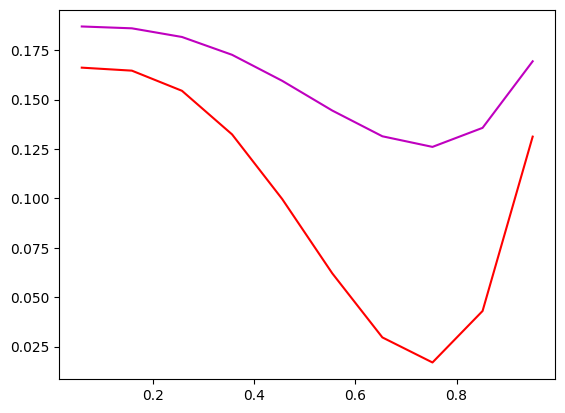

In [15]:
def get_loss_weights(y: None, prior_bias=0.2):
    # y can be float, list, np.array, or torch.tensor
    #
    yield_priors = lambda x:   0.0130 \
                             + 0.0035*x \
                             - 0.0950*x**2 \
                             + 0.8200*x**3 \
                             - 0.7400*x**4

    if isinstance(y, float) or isinstance(y, int):
        w = prior_bias-yield_priors(y)
        return w

    ws = prior_bias-np.array(list(map(yield_priors, y)))
    # ws = (ws*10)**2 # too vigorous weights may make unfavored results
    return ws

# x = np.arange(0, 1, 0.01)
y = get_loss_weights(x)
fig = plt.figure()
plt.plot(x, y, 'm-')
plt.plot(x, 0.2-y_pred, 'r-')
fig.show()

<class 'numpy.ndarray'>
{0: 1.6083550348533762, 1: 1.5159912807245406, 2: 1.4145614511731555, 3: 1.2136250385718474, 4: 0.9834549124270835, 5: 0.7650819998320295, 6: 0.6515703681974382, 7: 0.6147386076544852, 8: 0.7299077538882686, 9: 1.161039929030088, 10: 1.161039929030088}


C:\Users\admin\anaconda3\envs\chem\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


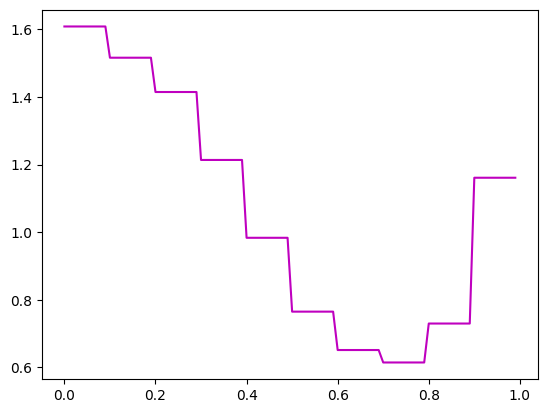

In [56]:
def get_loss_weights(y: None, exponent: float = 1.2):
    probs = np.array([0.173, 0.207, 0.249, 0.351, 0.514, 0.750, 0.929, 1.000, 0.800, 0.383, 0.383])
    ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    weights = 1. / (probs + 0.5) ** exponent
    weight_dict = dict(zip(ids, weights))
    print(weight_dict)
    if isinstance(y, float) or isinstance(y, int):
        w = prior_bias-torch.tensor(yield_priors(y))
        return weight_dict[floor(y*10)]
    if isinstance(y, torch.Tensor):
        return torch.tensor([weight_dict[floor(yy*10)] for yy in y])
    if isinstance(y, np.ndarray):
        return np.array([weight_dict[floor(yy*10)] for yy in y])
    
x = np.arange(0., 1.0, 0.01)
print(type(x))
y = get_loss_weights(x)
plt.plot(x, y, 'm-')

fig.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import torch

def get_weight(yd, exponent=1):
    """
    yield -> key: 0.12 -> 1, 0.98 -> 9
    :param exponent: 1 / (count+0.5) ** exponent
    :param yd: yield
    :return: weight
    """
    count_ar = np.array([1., 0.92762744, 0.79295154, 0.74008811, 0.46192574,
                         0.36563877, 0.23599748, 0.10258024, 0.05286344, 0.])
    count_ind = [7, 6, 8, 5, 4, 9, 3, 2, 1, 0]
    weight = 1 / (count_ar + 0.5) ** exponent
    weight_yd = dict(zip(count_ind, weight))
    weight_yd[10] = weight_yd[9]
    return weight_yd[floor(yd * 10)]  # 产率为100%情形，和9保持相同

def get_weight_1d(yd_1d, exponent=1):
    res = [get_weight(each, exponent) for each in yd_1d]
    if isinstance(yd_1d, torch.Tensor):
        return torch.Tensor(res).to(yd_1d.device)
    if isinstance(yd_1d, np.ndarray):
        return np.asarray(res)
    return res

C:\Users\admin\anaconda3\envs\chem\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


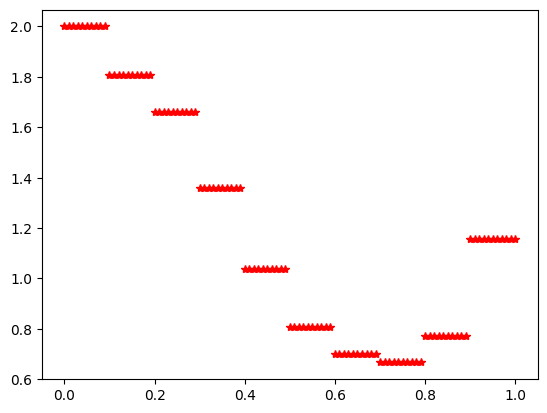

In [6]:
x = np.arange(0,1.01,0.01)
y = get_weight_1d(x)
fig = plt.figure()
plt.plot(x, y, 'r*')
fig.show()

C:\Users\admin\anaconda3\envs\chem\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


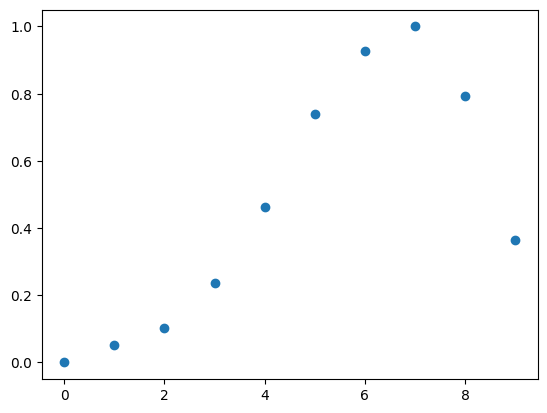

In [8]:
count_ar = np.array([1., 0.92762744, 0.79295154, 0.74008811, 0.46192574,
                         0.36563877, 0.23599748, 0.10258024, 0.05286344, 0.])
count_ind = [7, 6, 8, 5, 4, 9, 3, 2, 1, 0]
fig = plt.figure()
plt.scatter(count_ind, count_ar)
fig.show()

In [187]:
file = r"C:\Users\admin\Downloads\train_set_cover_subset-merge_regsol.pkl"
file = r'C:\Users\admin\Downloads\split_ind-modify_catreg-rule_split.pkl'
import pickle
with open(file, 'rb') as f:
    ids = pickle.load(f)
print(ids.keys())

dict_keys(['train', 'vali', 'test'])


In [208]:
tr = set(ids['train'])
va = set(ids['vali'])
te = set(ids['test'])
train_id2split = {v:'train' for v in ids['train']}
valid_id2split = {v:'valid' for v in ids['vali']}
test_id2split = {v:'test' for v in ids['test']}
all_splits = {**train_id2split, **valid_id2split, **test_id2split}

In [191]:
import pandas as pd
csv_file = '../data/scifinder_clean.csv'
reactions = pd.read_csv(csv_file, encoding='gb18030')
print(reactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Reactants_Smiles  11069 non-null  object 
 1   Products_Smiles   11069 non-null  object 
 2   Reagents_Smiles   11069 non-null  object 
 3   Catalysts_Smiles  11069 non-null  object 
 4   Steps             11069 non-null  int64  
 5   Stages            11069 non-null  int64  
 6   Yield             11069 non-null  float64
 7   Notes             11054 non-null  object 
 8   Title             11069 non-null  object 
 9   Type              10510 non-null  object 
 10  ori_row_number    11069 non-null  int64  
 11  split             0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.0+ MB
None


In [246]:
from collections import Counter
splits = []
splits_dict = {'train': [], 'valid': [], 'test': []}
for i, row in enumerate(reactions.itertuples()):
    try:
        splits.append(all_splits[row[11]])
        splits_dict[all_splits[row[11]]].append(i)
    except:
        ss = ['train', 'train', 'train', 'train', 'train', 'train', 'valid', 'test']
        s = random.choice(ss)
        splits.append(s)
        splits_dict[s].append(i)
print(Counter(splits))
reactions['split'] = splits
reactions.info()

Counter({'train': 7781, 'test': 1648, 'valid': 1640})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Reactants_Smiles  11069 non-null  object 
 1   Products_Smiles   11069 non-null  object 
 2   Reagents_Smiles   11069 non-null  object 
 3   Catalysts_Smiles  11069 non-null  object 
 4   Steps             11069 non-null  int64  
 5   Stages            11069 non-null  int64  
 6   Yield             11069 non-null  float64
 7   Notes             11054 non-null  object 
 8   Title             11069 non-null  object 
 9   Type              10510 non-null  object 
 10  ori_row_number    11069 non-null  int64  
 11  split             11069 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.0+ MB


In [247]:
reactions.to_csv('../data/scifinder_clean.csv')
np.save('../data/split_ids.npy', splits_dict)

In [236]:
len(splits_dict['train'])
len(splits_dict['valid'])
len(splits_dict['test'])

1632

In [250]:
xx = np.load('../data/split_ids.npy', allow_pickle=True).item()
len(xx['train'])

7781

In [273]:
y_ = torch.tensor((np.random.randn(6,3)))
y = torch.tensor([1,2,1,1,2,0])

loss_func = nn.CrossEntropyLoss()
print(loss_func(y_, y))

loss_dunc = nn.NLLLoss()
ls = nn.Softmax(dim=-1)
y_ = torch.log(ls(y_))
print(loss_func(y_, y))

tensor(1.2150, dtype=torch.float64)
tensor(1.2150, dtype=torch.float64)


In [284]:
from torchmetrics import Recall, Accuracy, Precision, AUROC
score_func = Accuracy()
s = score_func(y_.argmax(1), y)
print(s)
score_func = Recall(average='none', num_classes=3)
s = score_func(y_.argmax(1), y)
print(s)

score_func = Precision(average='none', num_classes=3)
s = score_func(y_.argmax(1), y)
print(s)

score_func = AUROC(average='macro', num_classes=3)
s = score_func(y_, y)
print(s)

tensor(0.3333)
tensor([0.0000, 0.3333, 0.5000])
tensor([0.0000, 0.5000, 0.3333])
tensor(0.4352)


In [2]:
import wandb
import random
wandb.init(
    project='my_awesome_project',
    config={
            'learning_rate': 0.02, 
            'architecture': 'CNN',
            'dataset': 'CIFAR-100',
            'epochs': 10
           }
)
epochs = 10
offset = random.random()/5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random()/epoch - offset
    loss = 2 ** -epoch + random.random()/epoch + offset
    
    wandb.log({'acc': acc, 'loss': loss})
wandb.finish()


acc,▂▁▅▅▇▆▇█
loss,█▇▄▂▄▃▁▂
acc,0.85913
loss,0.20669


In [5]:
help(wandb.init)

Help on function init in module wandb.sdk.wandb_init:

init(job_type: Union[str, NoneType] = None, dir=None, config: Union[Dict, str, NoneType] = None, project: Union[str, NoneType] = None, entity: Union[str, NoneType] = None, reinit: bool = None, tags: Union[Sequence, NoneType] = None, group: Union[str, NoneType] = None, name: Union[str, NoneType] = None, notes: Union[str, NoneType] = None, magic: Union[dict, str, bool] = None, config_exclude_keys=None, config_include_keys=None, anonymous: Union[str, NoneType] = None, mode: Union[str, NoneType] = None, allow_val_change: Union[bool, NoneType] = None, resume: Union[bool, str, NoneType] = None, force: Union[bool, NoneType] = None, tensorboard=None, sync_tensorboard=None, monitor_gym=None, save_code=None, id=None, settings: Union[wandb.sdk.wandb_settings.Settings, Dict[str, Any], NoneType] = None) -> Union[wandb.sdk.wandb_run.Run, wandb.sdk.lib.disabled.RunDisabled, NoneType]
    Starts a new run to track and log to W&B.
    
    In an ML

In [41]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
s = 'CC(C)=O'
mol = Chem.MolFromSmiles(s)
mols = Chem.rdchem.ResonanceMolSupplier(mol, maxStructs=2)
print(len(mols))
for m in mols:
    print(mol.GetNumAtoms())

1
4


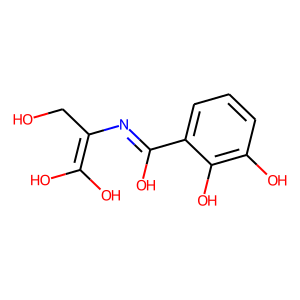

In [58]:
from rdkit.Chem.MolStandardize import rdMolStandardize
params = rdMolStandardize.CleanupParameters()
params.maxTautomers=100
enumerator = rdMolStandardize.TautomerEnumerator(params)
m = Chem.MolFromSmiles("OCC(N=C(O)c1cccc(O)c1O)=C(O)O")
Draw.MolToImage(m)
# cm = enumerator.Canonicalize(m)
# Draw.MolToImage(cm)

In [48]:
help(rdkit.Chem.MolStandardize.rdMolStandardize.CleanupParameters)

Help on class CleanupParameters in module rdkit.Chem.MolStandardize.rdMolStandardize:

class CleanupParameters(Boost.Python.instance)
 |  Parameters controlling molecular standardization
 |  
 |  Method resolution order:
 |      CleanupParameters
 |      Boost.Python.instance
 |      builtins.object
 |  
 |  Static methods defined here:
 |  
 |  __init__(...)
 |      __init__( (object)arg1) -> None :
 |      
 |          C++ signature :
 |              void __init__(struct _object * __ptr64)
 |  
 |  __reduce__ = <unnamed Boost.Python function>(...)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  acidbaseFile
 |      file containing the acid and base definitions
 |  
 |  doCanonical
 |      apply atom-order dependent normalizations (like uncharging) in a canonical order
 |  
 |  fragmentFile
 |      file containing the acid and base definitions
 |  
 |  largestFragmentChooserCountHeavyAtomsOnly
 |      whether 

In [37]:
import numpy as np
import torch
from torch import nn
weights = nn.Parameter(torch.tensor(np.random.randn(16, 32)))
bias = nn.Parameter(torch.tensor(np.random.randn(32)))
x = torch.tensor(np.random.randn(8, 24, 16))
print(x.shape)
print(weights.shape)
y = torch.einsum('ijk,km->ijm', x, weights) + bias
y.shape

torch.Size([8, 24, 16])
torch.Size([16, 32])


torch.Size([8, 24, 32])

In [33]:
help(torch.einsum)

Help on function einsum in module torch.functional:

einsum(*args)
    einsum(equation, *operands) -> Tensor
    
    Sums the product of the elements of the input :attr:`operands` along dimensions specified using a notation
    based on the Einstein summation convention.
    
    Einsum allows computing many common multi-dimensional linear algebraic array operations by representing them
    in a short-hand format based on the Einstein summation convention, given by :attr:`equation`. The details of
    this format are described below, but the general idea is to label every dimension of the input :attr:`operands`
    with some subscript and define which subscripts are part of the output. The output is then computed by summing
    the product of the elements of the :attr:`operands` along the dimensions whose subscripts are not part of the
    output. For example, matrix multiplication can be computed using einsum as `torch.einsum("ij,jk->ik", A, B)`.
    Here, j is the summation subscrip

In [5]:
help(Chem.rdchem.ResonanceMolSupplier)

Help on class ResonanceMolSupplier in module rdkit.Chem.rdchem:

class ResonanceMolSupplier(Boost.Python.instance)
 |  A class which supplies resonance structures (as mols) from a mol.
 |  
 |  Usage examples:
 |  
 |    1) Lazy evaluation: the resonance structures are not constructed
 |       until we ask for them:
 |  
 |       >>> suppl = ResonanceMolSupplier(mol)
 |       >>> for resMol in suppl:
 |       ...    resMol.GetNumAtoms()
 |  
 |    2) Lazy evaluation 2:
 |  
 |       >>> suppl = ResonanceMolSupplier(mol)
 |       >>> resMol1 = next(suppl)
 |       >>> resMol2 = next(suppl)
 |       >>> suppl.reset()
 |       >>> resMol3 = next(suppl)
 |       # resMol3 and resMol1 are the same: 
 |       >>> MolToSmiles(resMol3)==MolToSmiles(resMol1)
 |  
 |    3) Random Access:
 |  
 |       >>> suppl = ResonanceMolSupplier(mol)
 |       >>> resMol1 = suppl[0] 
 |       >>> resMol2 = suppl[1] 
 |  
 |       NOTE: this will generate an IndexError if the supplier doesn't have that many
 